### import required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv'

### load  **Candy Power Ranking** dataset

In [4]:
df=pd.read_csv(url)
df.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### inspect the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


**The Candy Power Ranking** dataset contains 9 categorical variables **(chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus)**, 3 continuous variables **(sugarpercent, pricepercent, winpercent)**, and 1 nominal variable **competitorname**.

+ The dataset contains the following fields:

   + **chocolate**	Does it contain chocolate?
   + **fruity**	Is it fruit flavored?
   + **caramel**	Is there caramel in the candy?
   + **peanutalmondy**	Does it contain peanuts, peanut butter or almonds?
   + **nougat**	Does it contain nougat?
   + **crispedricewafer**	Does it contain crisped rice, wafers, or a cookie component?
   + **hard**	Is it a hard candy?
   + **bar**	Is it a candy bar?
   + **pluribus**	Is it one of many candies in a bag or box?
   + **sugarpercent**	The percentile of sugar it falls under within the data set.
   + **pricepercent**	The unit price percentile compared to the rest of the set.
   + **winpercent**	The overall win percentage 

For categorical variables, **0** signifies **does not contain that property**,' while **1** indicates **contains that property**

### check dimension of the dataset

In [5]:
df.shape

(85, 13)

dataset contains 85 rows and 13 columns

### check for missing or null values

In [6]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

there is now **missing** **null** values :)

### check for duplicate values

In [8]:
df.duplicated().sum()

0

the dataset is seemed to be already cleaned. so we do not need to clean the dataset.:)

### descriptive statistics on continuous variables

In [33]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800
pricepercent,85.0,0.468882,0.285740,0.011000,0.255000,0.465000,0.651000,0.97600
winpercent,85.0,50.316764,14.714357,22.445341,39.141056,47.829754,59.863998,84.18029


### descriptive statistics on continuous variables

In [27]:
cols=df.columns.tolist() ## cols stores all the column names.

In [34]:
df[[col for col in cols if col not in ['sugarpercent','pricepercent','winpercent',
                                       'competitorname']]].astype('object').describe().T 
## converting int->object in order to perform describe method on categorical variables

,count,unique,top,freq
chocolate,85,2,0,48
fruity,85,2,0,47
caramel,85,2,0,71
peanutyalmondy,85,2,0,71
nougat,85,2,0,78
crispedricewafer,85,2,0,78
hard,85,2,0,70
bar,85,2,0,64
pluribus,85,2,1,44


Most of the candies do not have the given properties except for **pluribus**.

## Exploratory Data Analysis (EDA)

### Let's examine the seven most popular and seven least popular candies.

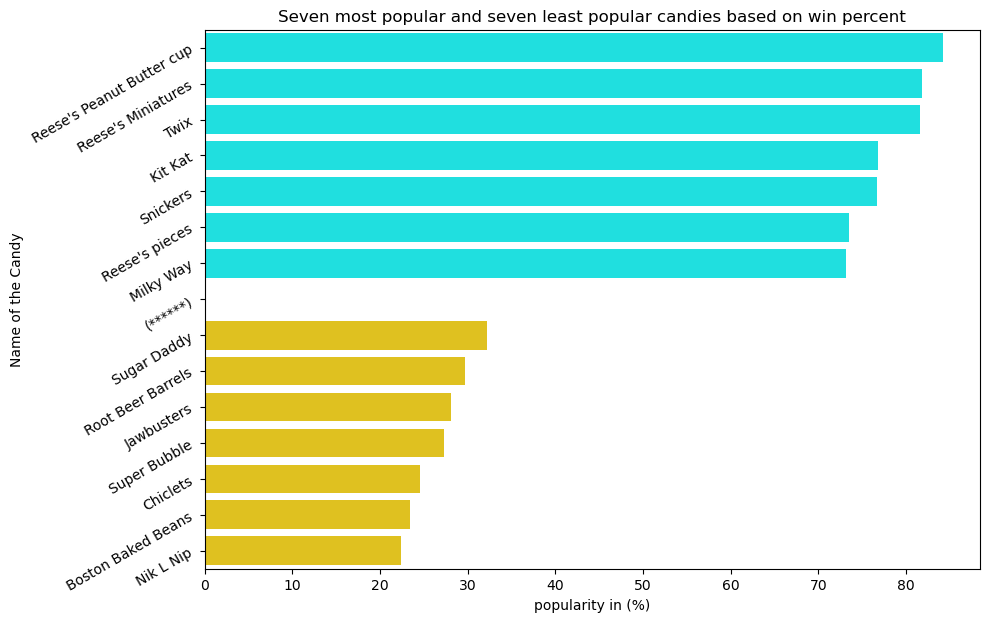

In [61]:
plt.figure(figsize=(10, 7))
sorted_df=df.sort_values(by='winpercent',ascending=False)
sns.barplot(data=pd.concat([sorted_df.head(7),pd.DataFrame({'competitorname':['(******)'],'winpercent':[0]}),
     sorted_df.tail(7)]),x='winpercent',y='competitorname',palette=['#00FFFF']*7 +['white']+ ['#FFD700']*7)
plt.xlabel('popularity in (%)')
plt.ylabel('Name of the Candy')
plt.yticks(rotation=30)
plt.title("Seven most popular and seven least popular candies based on win percent")
plt.show()

+ **Reese's Peanut Butter cup** is the most popular Candy with the winpercent of more than $80\%$.
+ **Nik L Nip** is the least popular Candy with the winpercent of almost $20\%$.

## Let's create visualizations highlighting the distinguishing characteristics that contribute to a candy's popularity, whether it ranks among the most favored or least favored.

In [122]:
cat_vars=["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus"]
cont_vars=['sugarpercent','pricepercent','winpercent']

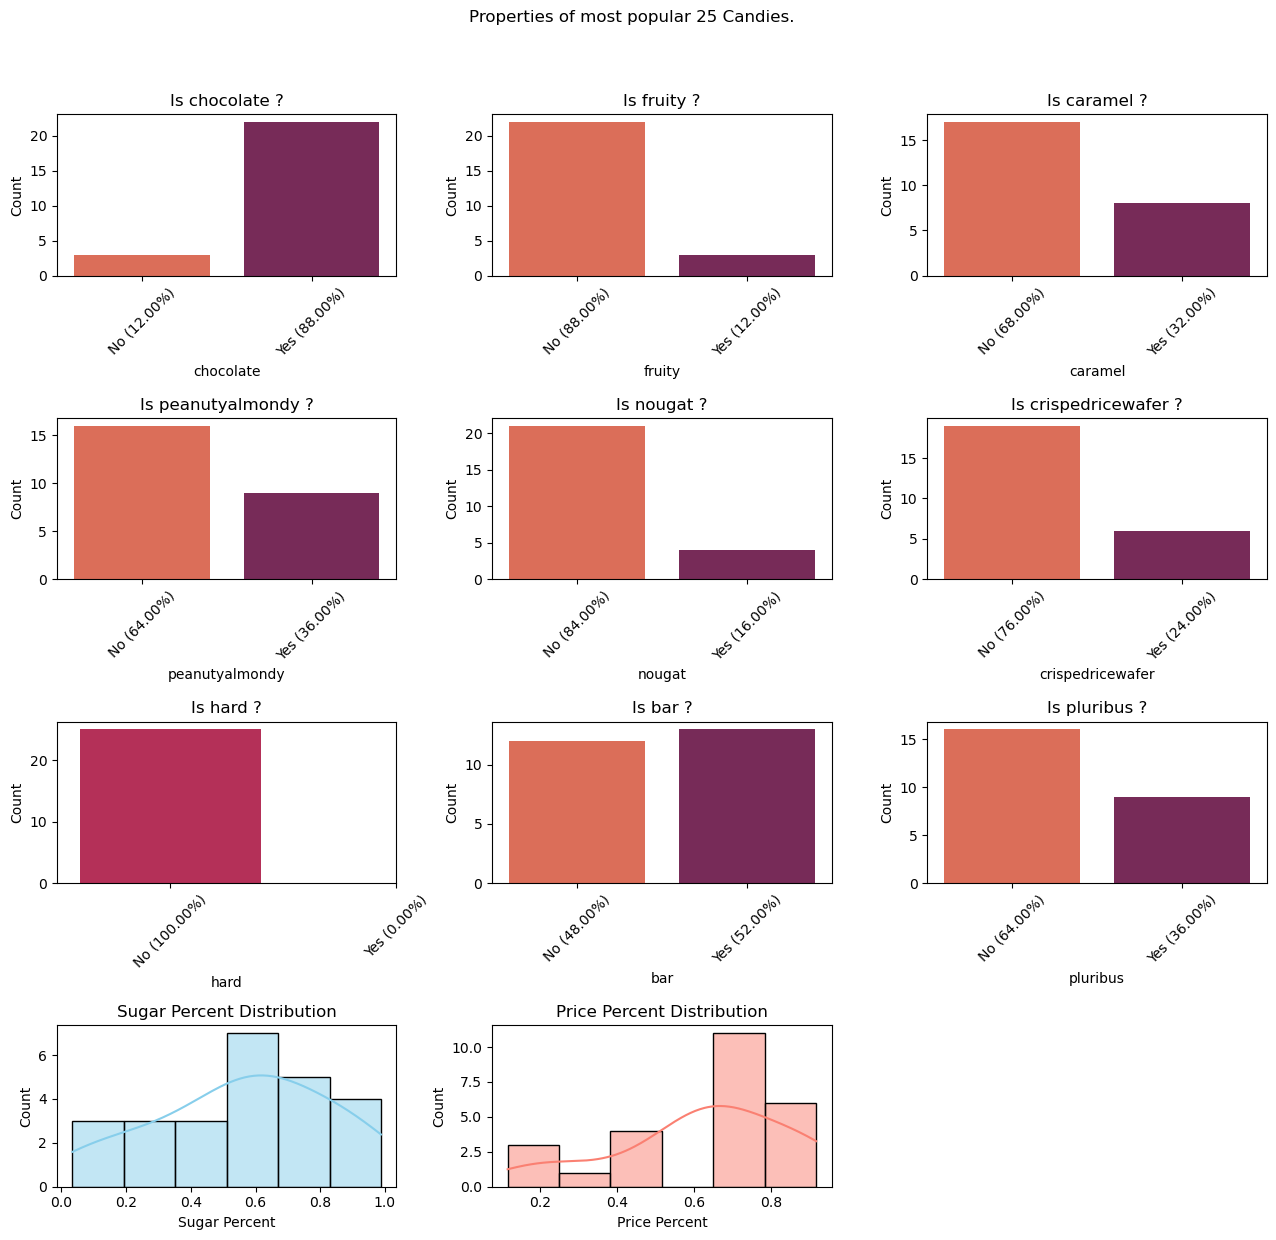

In [142]:
bb

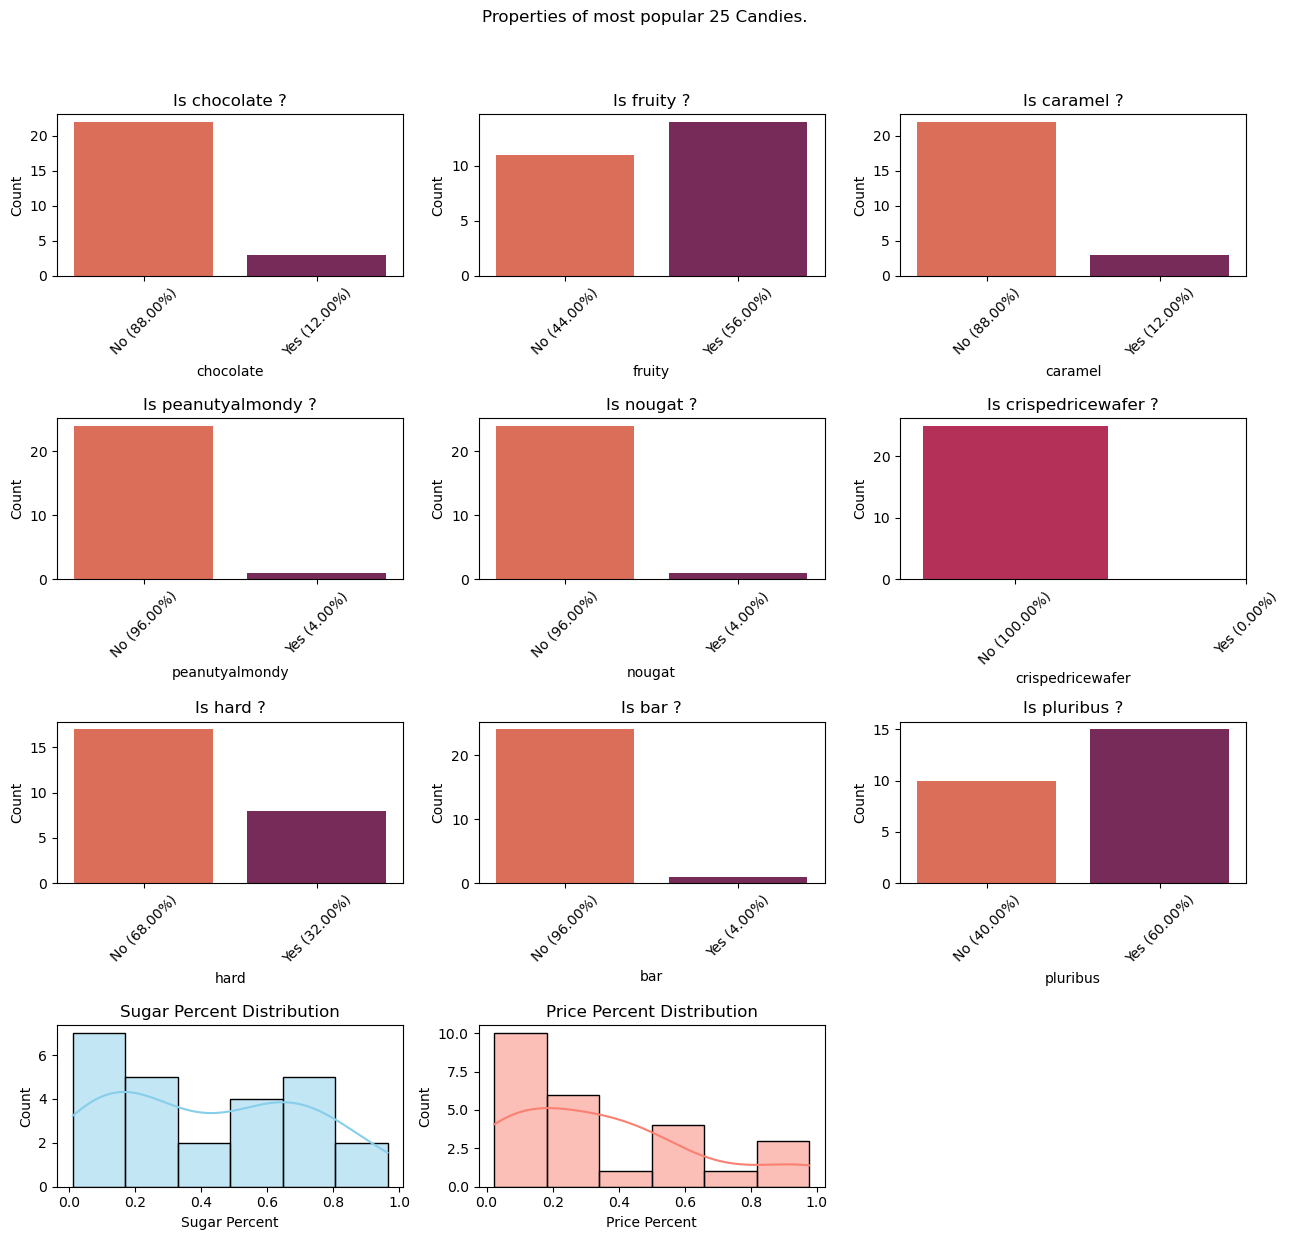

In [141]:
most_popular=df.sort_values(by='winpercent',ascending=True).iloc[:25,]
fig, ax = plt.subplots(4, 3, figsize=(13, 13))
axes = ax.flatten()
idx = 0
for i in range(3):
    for j in range(3):  
        if idx < len(cat_vars):
            sns.countplot(x=cat_vars[idx], data=most_popular, ax=ax[i, j], palette='rocket_r')
            axes[idx].set_title(f'Is {cat_vars[idx]} ?')
            axes[idx].set_ylabel('Count')
            counts = most_popular[cat_vars[idx]].value_counts(normalize=True) * 100
            no_percent = counts[0] if 0 in counts.index else 0
            yes_percent = counts[1] if 1 in counts.index else 0
            axes[idx].set_xticks([0, 1])
            axes[idx].set_xticklabels([f"No ({no_percent:.2f}%)", f"Yes ({yes_percent:.2f}%)"], rotation=45)
        else:
            # Hide the empty subplot
            ax[i, j].axis('off')
        idx += 1
# Plot histograms for continuous variables
sns.histplot(most_popular['sugarpercent'], ax=ax[3, 0], kde=True, color='skyblue')
ax[3, 0].set_title('Sugar Percent Distribution')
ax[3, 0].set_xlabel('Sugar Percent')

sns.histplot(most_popular['pricepercent'], ax=ax[3, 1], kde=True, color='salmon')
ax[3, 1].set_title('Price Percent Distribution')
ax[3, 1].set_xlabel('Price Percent')

# Hide the empty subplot
ax[3, 2].axis('off')

plt.suptitle('Properties of most popular 25 Candies.')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [145]:
def convert_winpercent_to_cat(x):
    if x>=0 and x<39.141056:
        return 'low'
    elif x>=39.141056 and x<59.863998:
        return 'medium'
    return 'high'

In [146]:
df['winpercent_class']=df['winpercent'].apply(convert_winpercent_to_cat)
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent_class
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,high
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,high
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,low
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,medium
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,medium


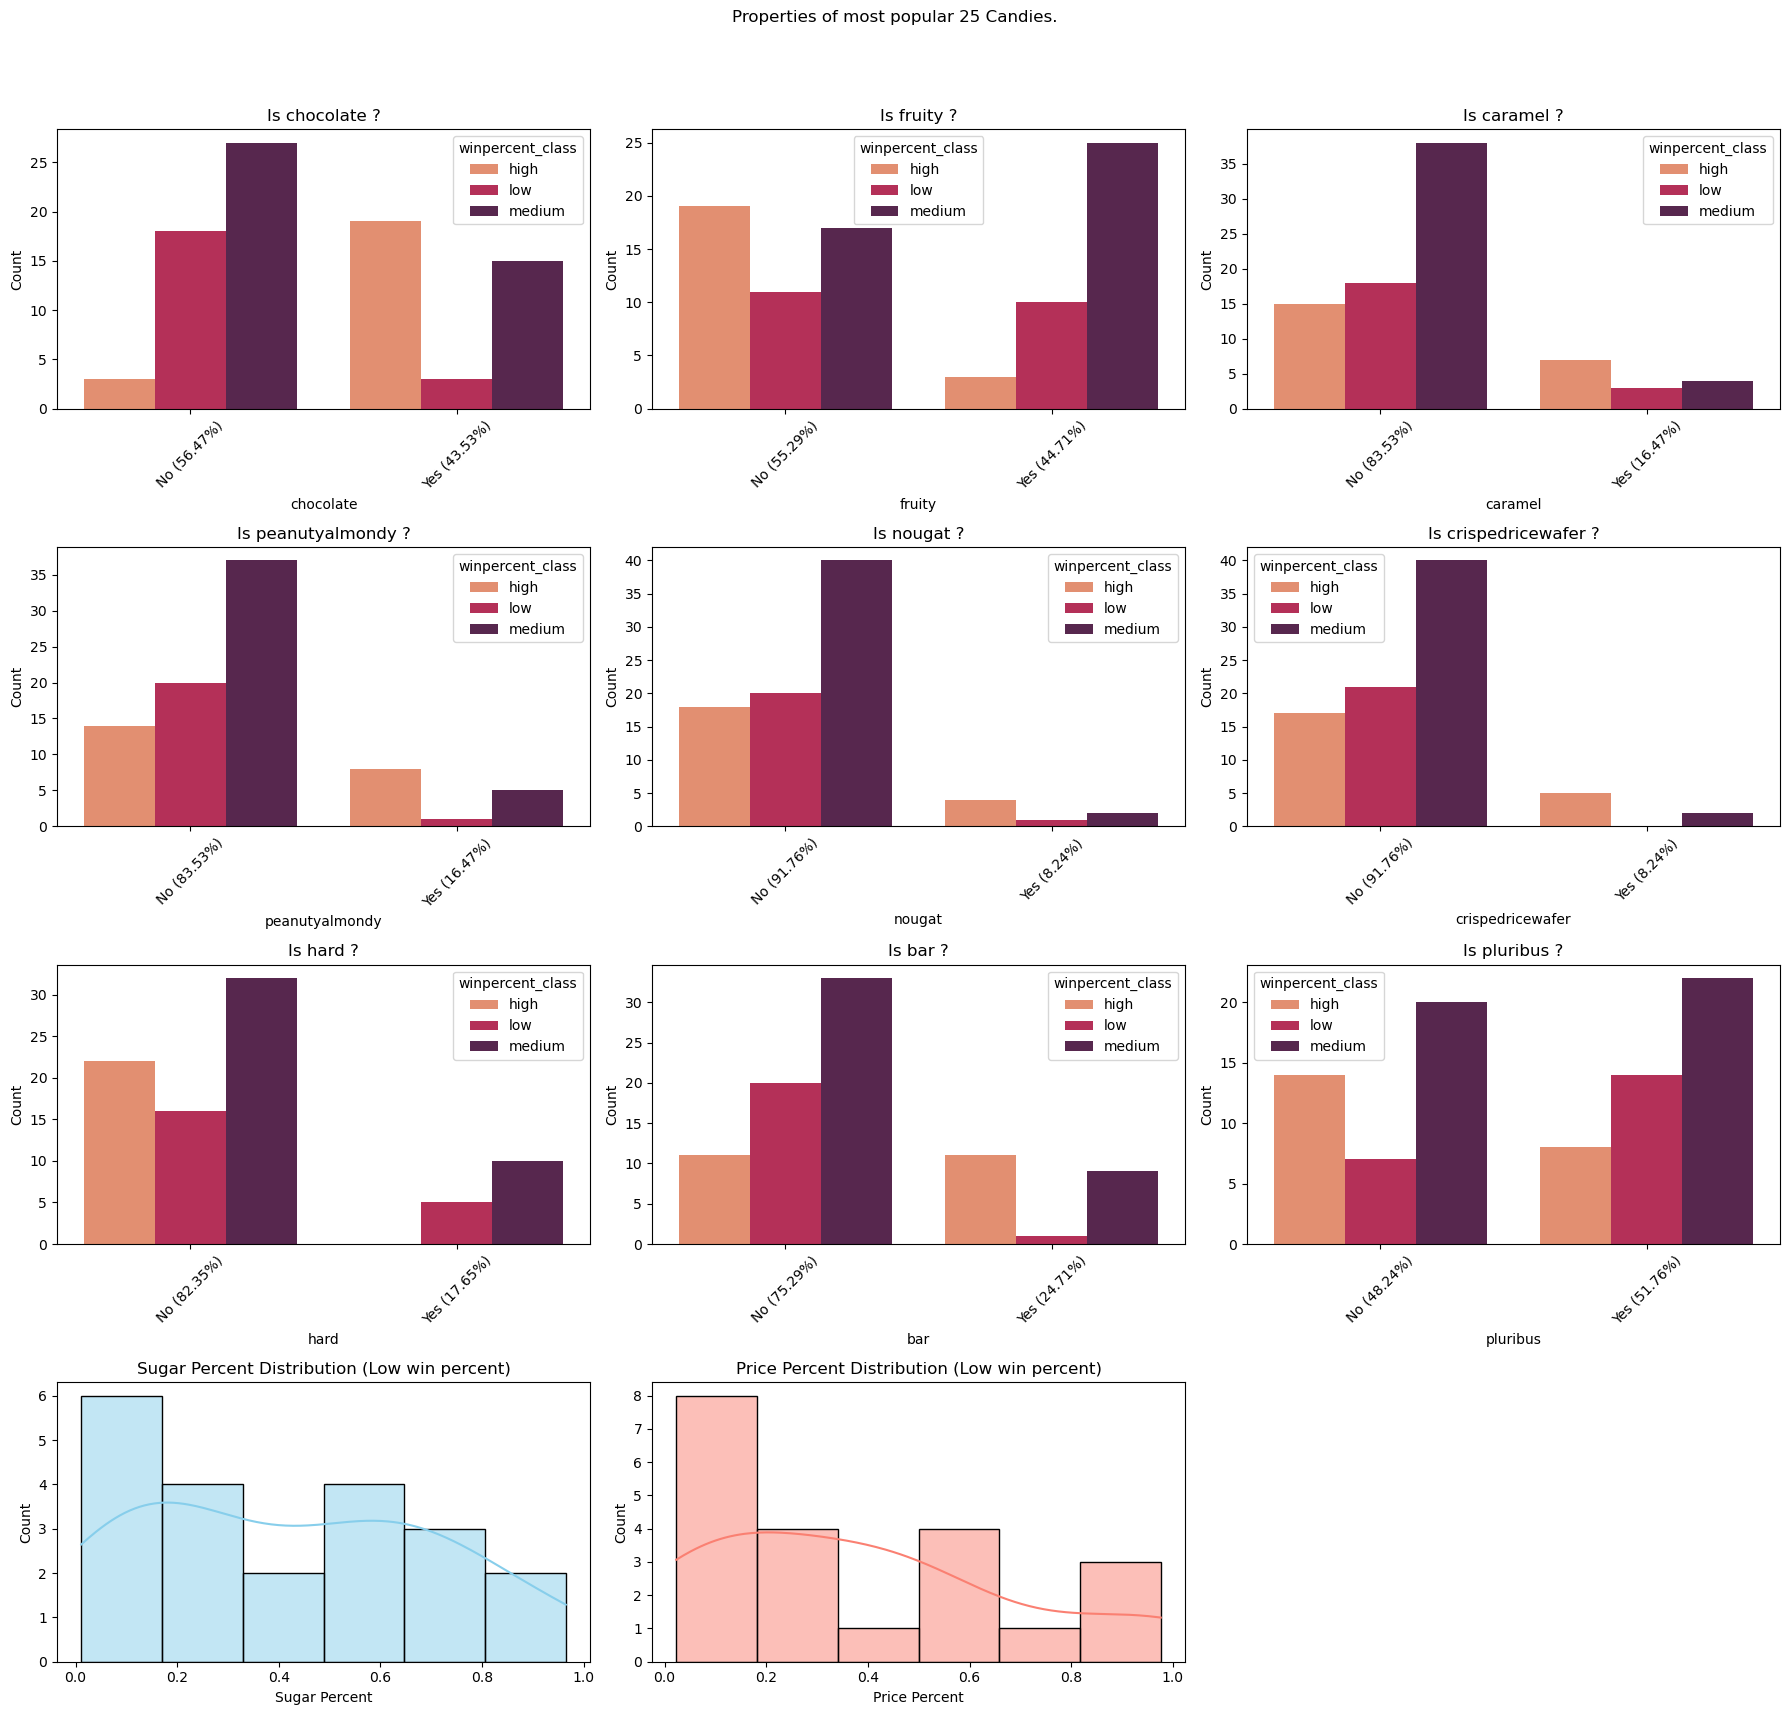

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

most_popular = df#df.sort_values(by='winpercent', ascending=True).iloc[:25,]
fig, ax = plt.subplots(4, 3, figsize=(18, 18))
axes = ax.flatten()
idx = 0

for i in range(3):
    for j in range(3):  
        if idx < len(cat_vars):
            sns.countplot(x=cat_vars[idx], data=most_popular, ax=ax[i, j], palette='rocket_r', hue='winpercent_class')
            axes[idx].set_title(f'Is {cat_vars[idx]} ?')
            axes[idx].set_ylabel('Count')
            counts = most_popular[cat_vars[idx]].value_counts(normalize=True) * 100
            no_percent = counts[0] if 0 in counts.index else 0
            yes_percent = counts[1] if 1 in counts.index else 0
            axes[idx].set_xticks([0, 1])
            axes[idx].set_xticklabels([f"No ({no_percent:.2f}%)", f"Yes ({yes_percent:.2f}%)"], rotation=45)
        else:
            # Hide the empty subplot
            ax[i, j].axis('off')
        idx += 1

# Plot separate histograms for continuous variables based on 'winpercent_class'
sns.histplot(most_popular[most_popular['winpercent_class'] == 'low']['sugarpercent'], ax=ax[3, 0], kde=True, color='skyblue')
ax[3, 0].set_title('Sugar Percent Distribution (Low win percent)')
ax[3, 0].set_xlabel('Sugar Percent')

sns.histplot(most_popular[most_popular['winpercent_class'] == 'low']['pricepercent'], ax=ax[3, 1], kde=True, color='salmon')
ax[3, 1].set_title('Price Percent Distribution (Low win percent)')
ax[3, 1].set_xlabel('Price Percent')

# Hide the empty subplot
ax[3, 2].axis('off')

plt.suptitle('Properties of most popular 25 Candies.')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


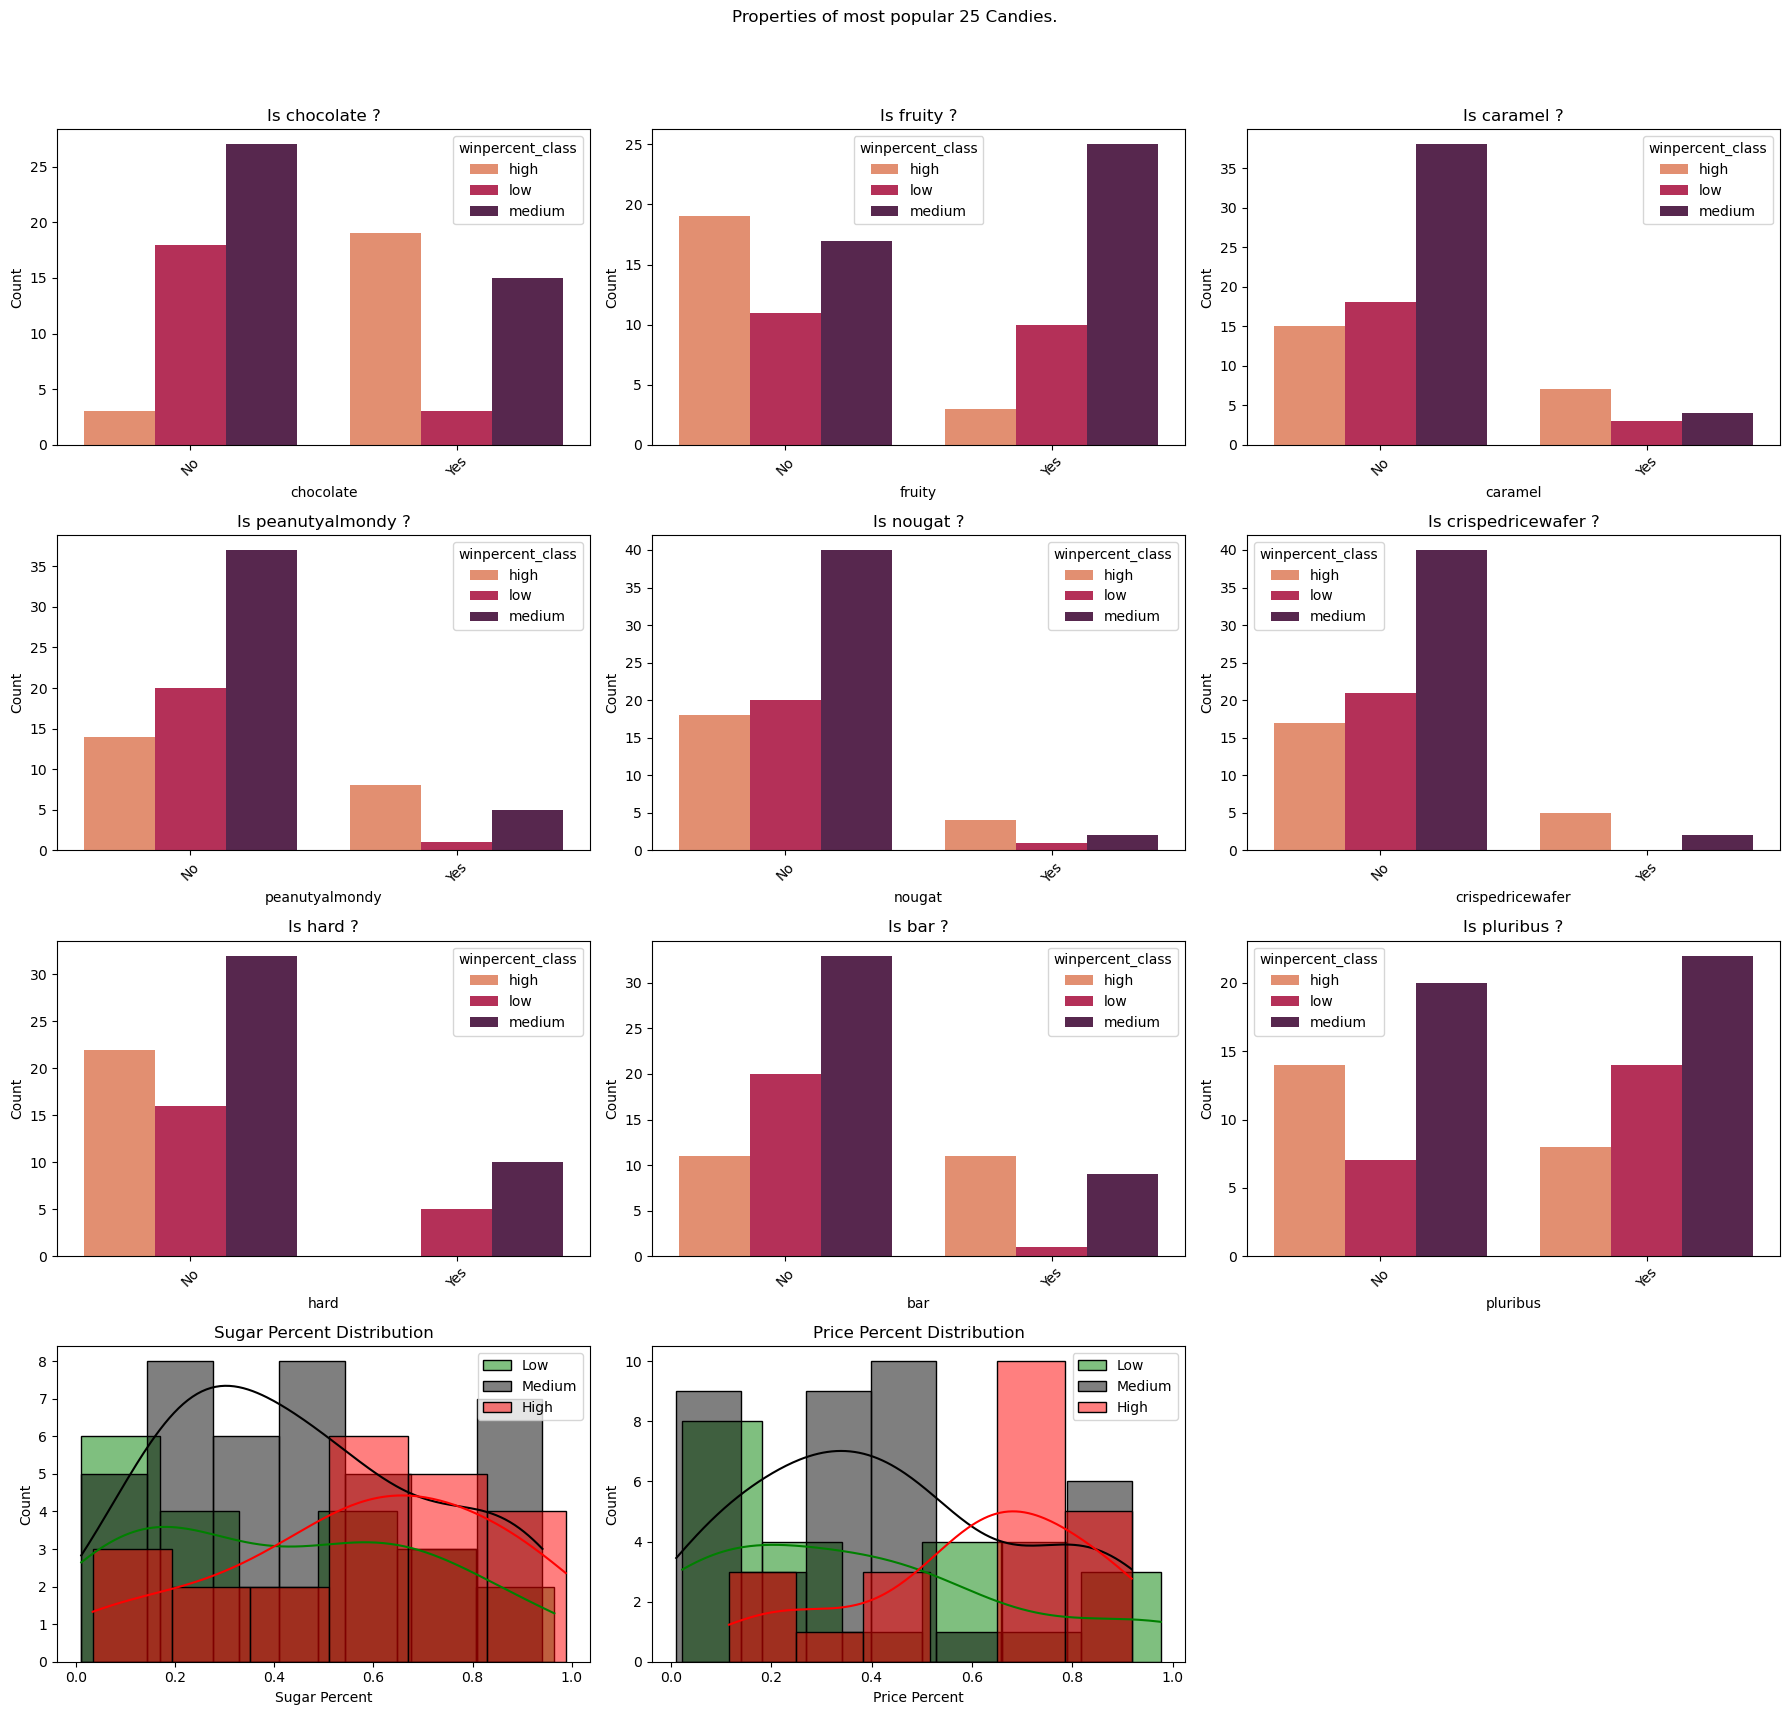

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

most_popular = df#.sort_values(by='winpercent', ascending=True).iloc[:25,]
fig, ax = plt.subplots(4, 3, figsize=(18, 18))
axes = ax.flatten()
idx = 0

for i in range(3):
    for j in range(3):  
        if idx < len(cat_vars):
            sns.countplot(x=cat_vars[idx], data=most_popular, ax=ax[i, j], palette='rocket_r', hue='winpercent_class')
            axes[idx].set_title(f'Is {cat_vars[idx]} ?')
            axes[idx].set_ylabel('Count')
            axes[idx].set_xticks([0, 1])
            axes[idx].set_xticklabels(['No','Yes'], rotation=45)
        else:
            # Hide the empty subplot
            ax[i, j].axis('off')
        idx += 1

# Plot separate histograms for continuous variables based on 'winpercent_class'
for cls, color in zip(['low', 'medium', 'high'], ['green', 'black', 'red']):
    sns.histplot(most_popular[most_popular['winpercent_class'] == cls]['sugarpercent'], ax=ax[3, 0], kde=True, color=color, label=cls.capitalize())
    sns.histplot(most_popular[most_popular['winpercent_class'] == cls]['pricepercent'], ax=ax[3, 1], kde=True, color=color, label=cls.capitalize())

ax[3, 0].set_title('Sugar Percent Distribution')
ax[3, 0].set_xlabel('Sugar Percent')
ax[3, 1].set_title('Price Percent Distribution')
ax[3, 1].set_xlabel('Price Percent')
ax[3, 0].legend()
ax[3, 1].legend()

# Hide the empty subplot
ax[3, 2].axis('off')

plt.suptitle('Properties of most popular 25 Candies.')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
